In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing .image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Digital_Naturalist_Dataset',target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Digital_Naturalist_Dataset',target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 138 images belonging to 3 classes.
Found 138 images belonging to 3 classes.


In [5]:
x_train.class_indices

{'Bird': 0, 'Flower': 1, 'Mammal': 2}

In [6]:
birds=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Digital_Naturalist_Dataset/Bird')

Found 42 images belonging to 2 classes.


In [7]:
birds.class_indices

{'Great_Indian_Bustard_Bird': 0, 'Spoon Billed Sandpiper Bird': 1}

In [8]:
flowers=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Digital_Naturalist_Dataset/Flower')

Found 49 images belonging to 2 classes.


In [9]:
flowers.class_indices

{'Corpse Flower': 0, 'Lady Slipper Orchid Flower': 1}

In [10]:
mammals=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Digital_Naturalist_Dataset/Mammal')

Found 47 images belonging to 2 classes.


In [11]:
mammals.class_indices

{'Pangolin Mammal': 0, 'Senenca White Deer Mammal': 1}

In [12]:
model=Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3)))

In [14]:
model.add(MaxPooling2D((2,2)))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units = 128, kernel_initializer= "random_uniform",activation = "relu"))

In [18]:
model.add(Dense(units = 3, kernel_initializer= "random_uniform",activation = "softmax"))


In [19]:
model.compile(optimizer= "rmsprop",loss = "categorical_crossentropy" , metrics =["accuracy"])


In [20]:
model.fit_generator(x_train,steps_per_epoch =251 ,epochs = 5, validation_data = x_test,validation_steps =28 )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
  5/251 [..............................] - ETA: 26:28 - loss: 1.2313 - accuracy: 0.4058

251/251 [==============================] - 32s 110ms/step - loss: 1.2313 - accuracy: 0.4058 - val_loss: 0.9862 - val_accuracy: 0.5652


In [26]:
h5_path=r'/content/drive/MyDrive/Colab/final_model.h5'

In [22]:
import h5py

In [28]:
model.save(h5_path)

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np
model = load_model(h5_path)

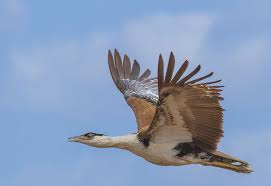

In [31]:
from IPython.display import Image
img=Image(filename=r'/content/drive/MyDrive/Digital_Naturalist_Dataset/Bird/Great_Indian_Bustard_Bird/download(9).jpg')
img

In [32]:
from tensorflow.keras.preprocessing  import image
path2=r'/content/drive/MyDrive/Digital_Naturalist_Dataset/Bird/Great_Indian_Bustard_Bird/download(9).jpg'

img = image.load_img(path2,target_size = (64,64))

In [33]:
type(img)
#PIL.Image.Image

PIL.Image.Image

In [34]:
x = image.img_to_array(img)

In [35]:
x.shape

(64, 64, 3)

In [36]:
type(x)

numpy.ndarray

In [37]:
x = np.expand_dims(x,axis = 0)
x.shape

(1, 64, 64, 3)

In [38]:
pred = np.argmax(model.predict(x))
pred

1/1 [==============================] - 0s 172ms/step


0

In [39]:
index=["birds","flowers","mammals"]

In [40]:
natur1=index[pred]

In [41]:
natur1

'birds'

In [42]:
if natur1=="birds":
 a=["Great Indian Bustard Bird","Spoon Billed Sandpiper Bird"]
elif natur1=="flowers":
 a=[" Corpse Flower", "Lady Slipper Orchid Flower"]
else:
 a=["Pangolin Mammal","Senenca White Deer Mammal"]

In [43]:
a

['Great Indian Bustard Bird', 'Spoon Billed Sandpiper Bird']

In [44]:
natur1=a[pred]

In [45]:
natur1


'Great Indian Bustard Bird'

In [46]:
model.save_weights("naturalist")